In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [235]:
df = pd.read_csv("/Users/filippo/ScrivaniaLocale/E-HealthProject/dataset.csv",index_col=0)
print(df.head(10))
print(df.shape)

   index   age  gender  education  marital  income  phq_1  phq_2  phq_3  \
0      0  42.0       1        5.0        1   18000      0    0.0    1.0   
1      1  51.0       3       18.0        1   23000      0    0.0    0.0   
2      2  40.0       0        8.0        1   10000      0    0.0    0.0   
3      3  19.0       0       25.0        5   31000      2    1.0    0.0   
4      4  42.0       2       13.0        1   40000      0    1.0    0.0   
5      5  48.0       2       13.0        1   11000      0    0.0    0.0   
6      6  33.0       0       22.0        2   36400      0    1.0    0.0   
7      7  55.0       2        8.0        2   28000      0    0.0    0.0   
8      8  40.0       3       18.0        3   12000      0    0.0    0.0   
9      9  46.0       2       13.0        1   35000      2    0.0    2.0   

   phq_4  ...  ccs_3  ccs_4  ccs_5  ccs_6  ccs_7  ccs_8  ccs_9  ccs_10  \
0      0  ...    5.0    1.0    4.0    3.0      0      4      0       0   
1      0  ...    3.0    6.

In [236]:
print(df.isna().sum().sum())

0


<AxesSubplot:>

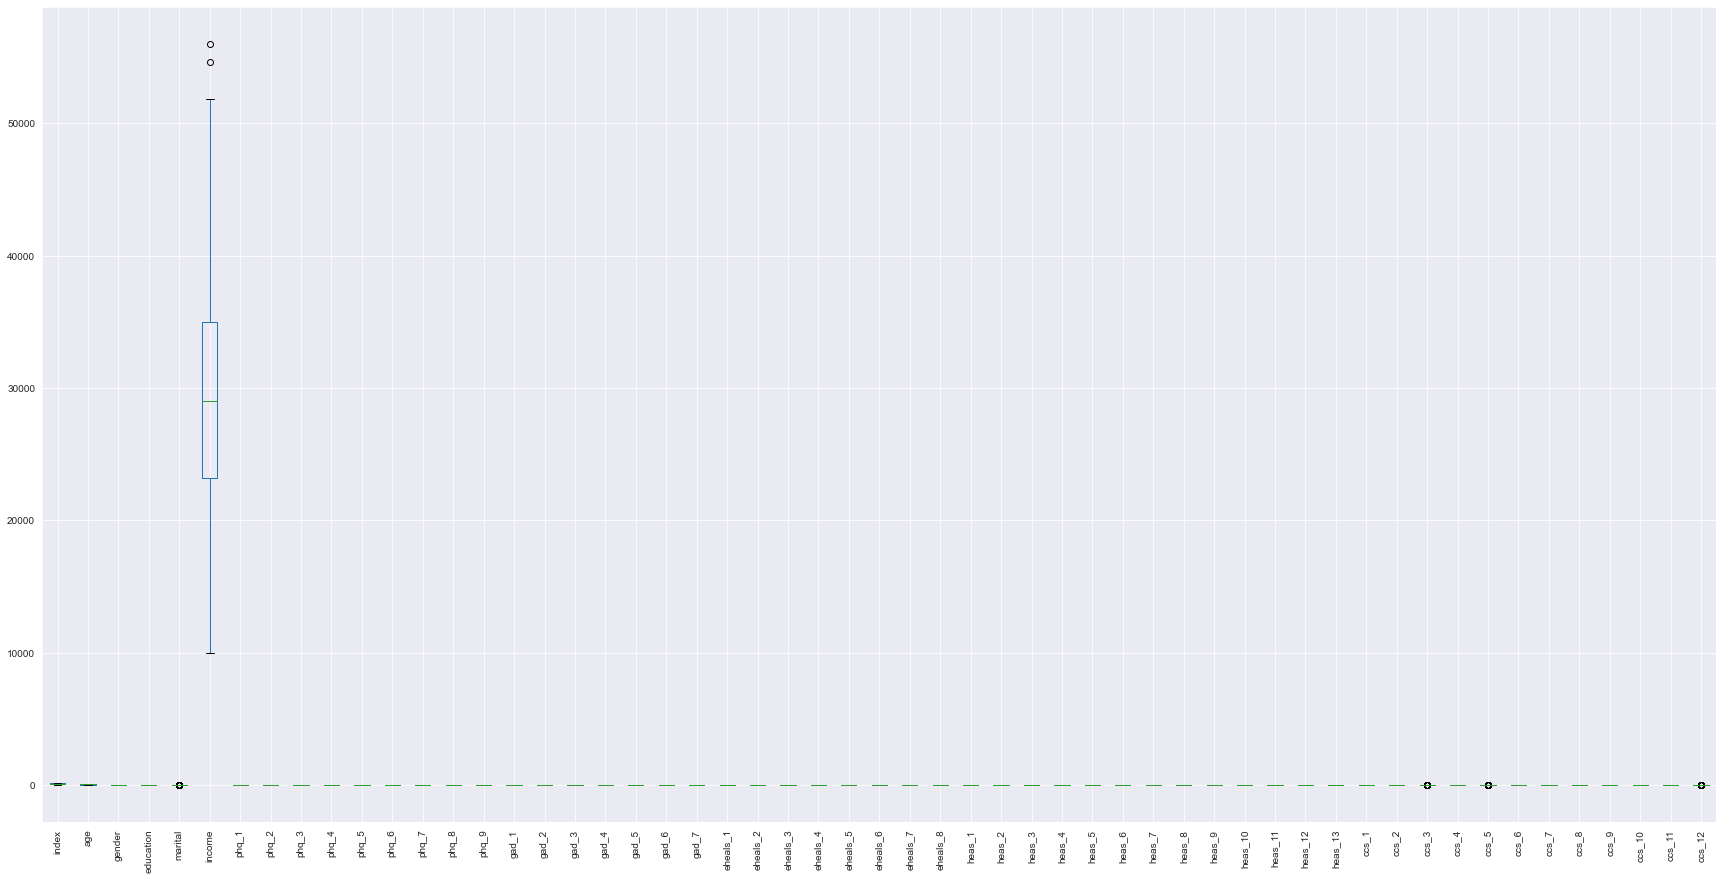

In [237]:
df.boxplot(rot=90,figsize=(30,15))

In [238]:
## INCOME 
df_income = df.income
max_income = max(df_income)
min_income = min(df_income)

df_income = (df_income - min_income)/(max_income - min_income)

df['income'] = df_income

## AGE
df_age = df.age
max_age = max(df_age)
min_age = min(df_age)

print("Max age: ", max_age)
print("Min age: ", min_age)

df_age = (df_age - min_age)/(max_age - min_age)

df['age'] = df_age

## EDUCATION
df_education = df.education
max_education = max(df_education)
min_education = min(df_education)

df_education = (df_education - min_education)/(max_education - min_education)

df['education'] = df_education

Max age:  55.0
Min age:  18.0


<AxesSubplot:>

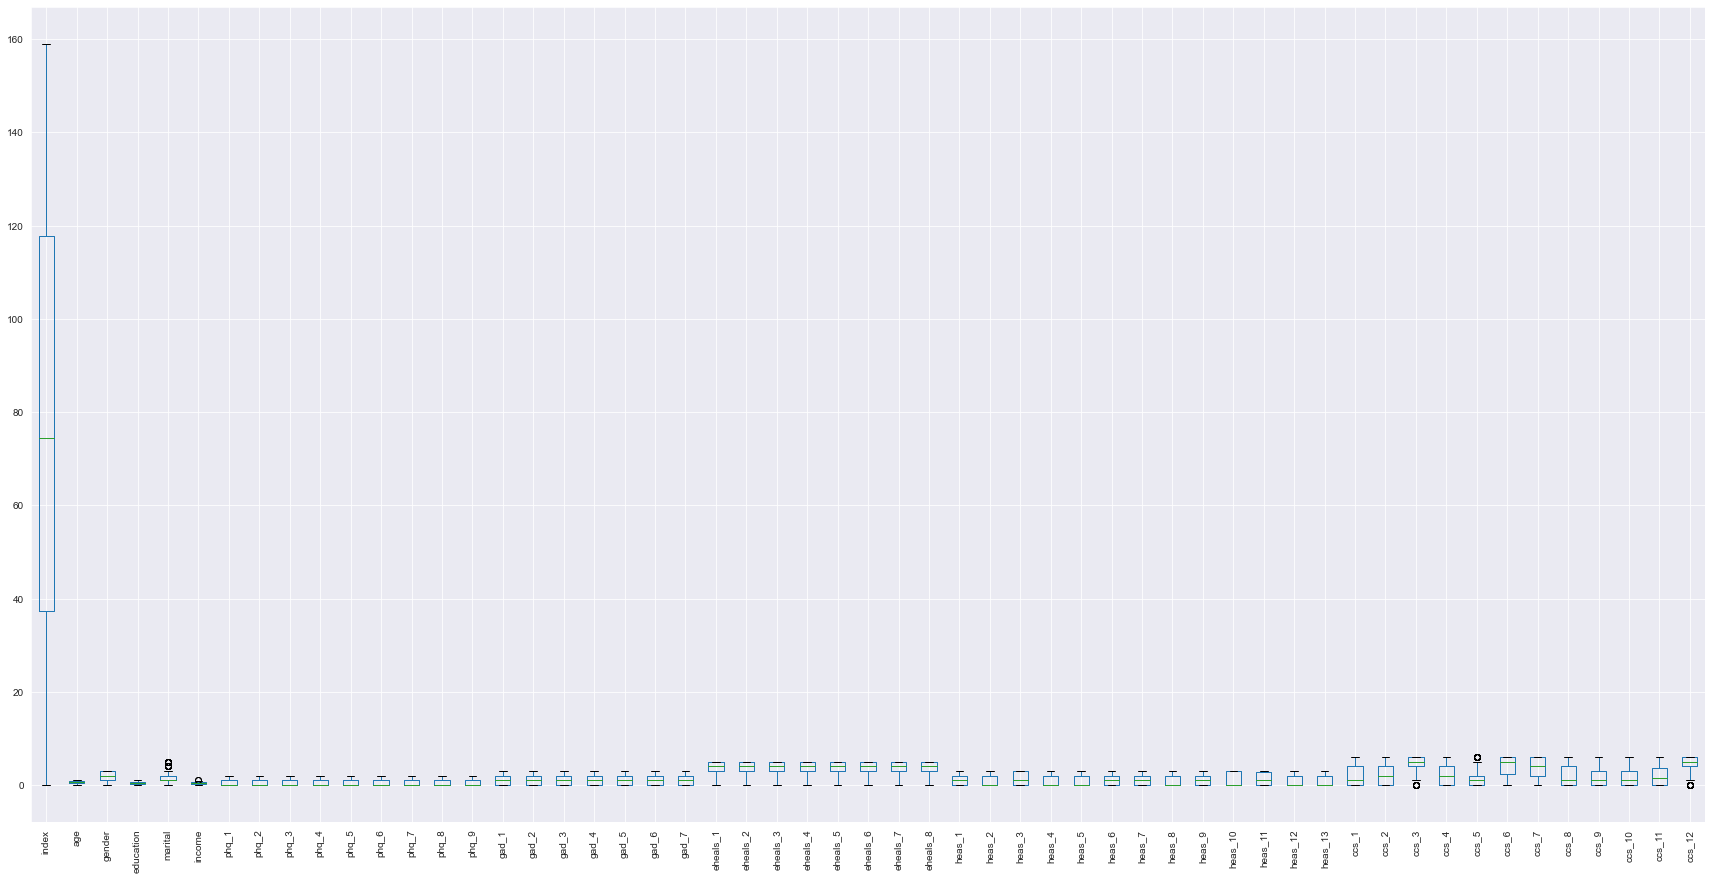

In [239]:
df.boxplot(rot=90,figsize=(30,15))

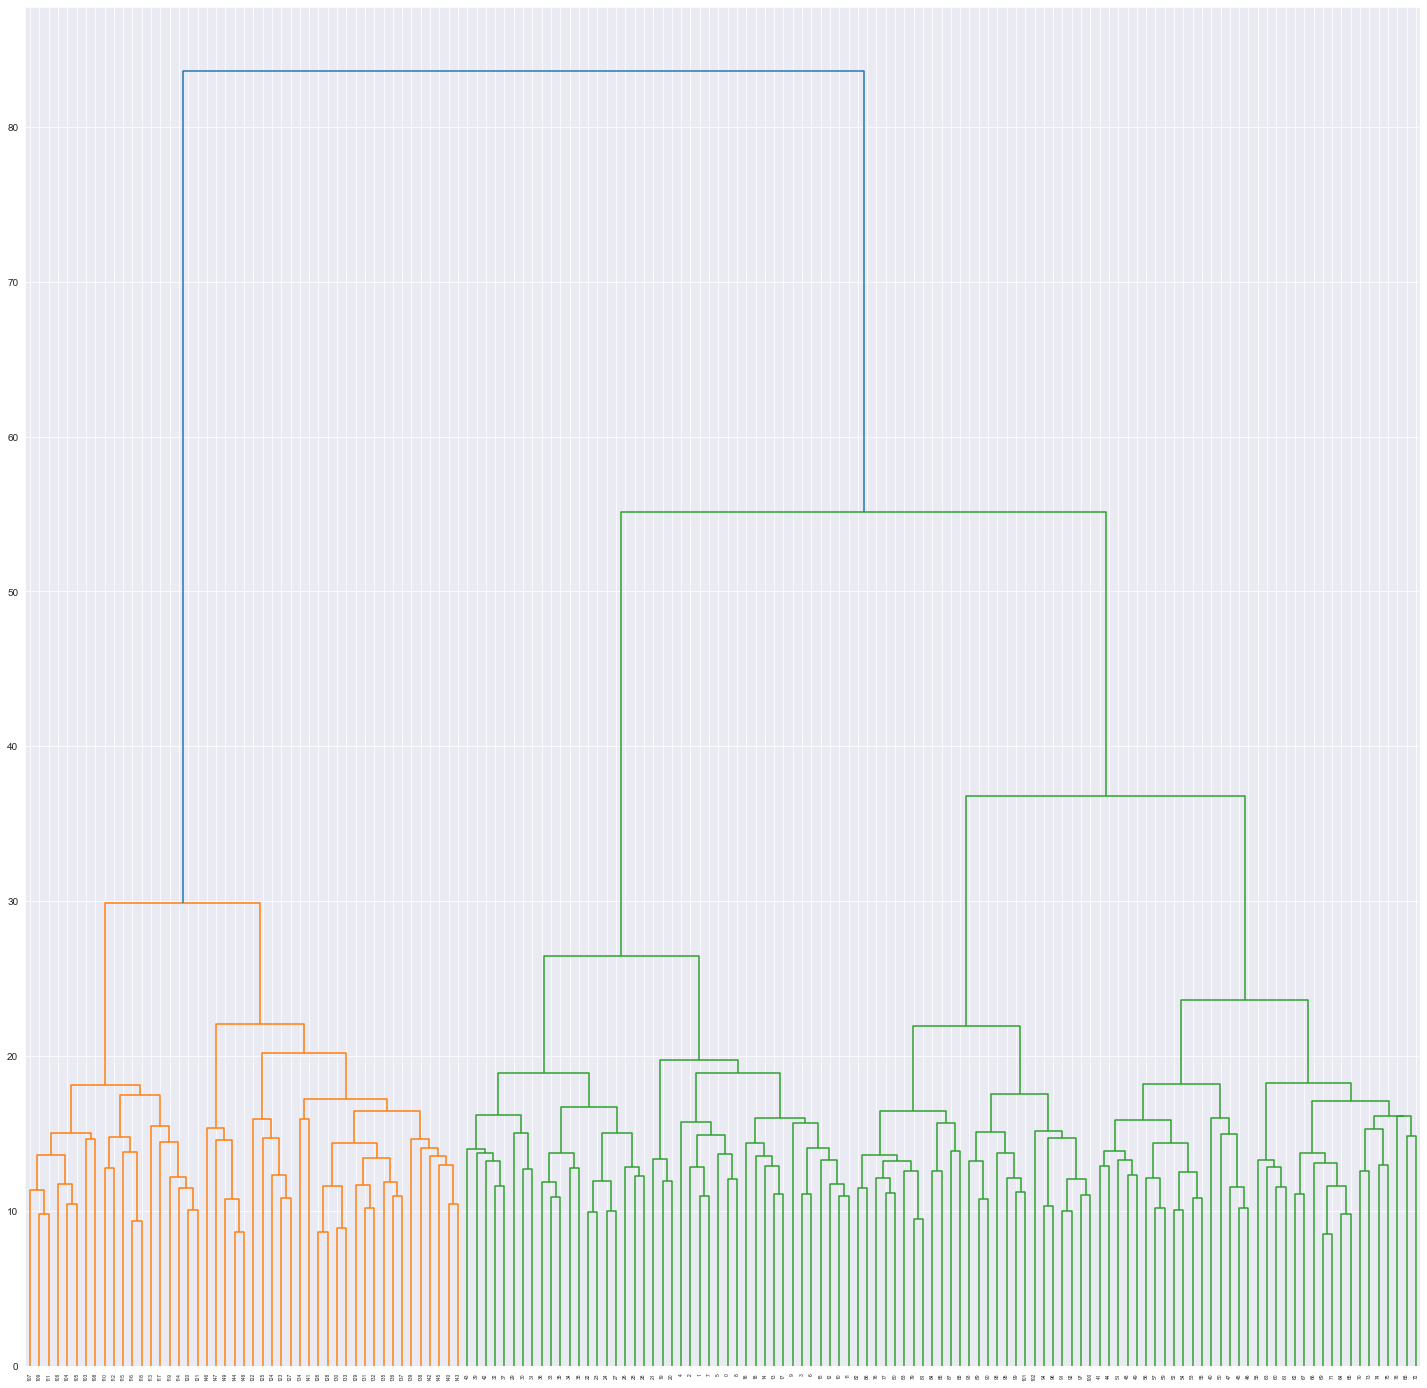

In [240]:
from scipy.cluster.hierarchy import dendrogram, linkage, fclusterdata

linkageData = linkage(df,method='average',metric='euclidean')

plt.figure(figsize=(25,25))
dendrogram(linkageData)
plt.show()


In [241]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='average')

unique = np.unique(clusterLabels)
print(unique)

[1 2 3]


In [242]:
from sklearn.metrics import silhouette_samples,silhouette_score

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

For n_clusters = 3 The average silhouette_score is : 0.470489380106485
[ 0.63866669  0.64597805  0.64266935  0.65098575  0.65127692  0.64901431
  0.66890605  0.66156498  0.67260453  0.66262558  0.66948155  0.68231512
  0.6749235   0.67850193  0.6818933   0.66276762  0.67707452  0.67590123
  0.65781729  0.65153331  0.65547815  0.64110416  0.64785419  0.62698868
  0.62523046  0.61495485  0.61395754  0.59637415  0.59276575  0.56081391
  0.54362044  0.53072558  0.52057941  0.47874572  0.48498845  0.44687643
  0.41976866  0.39554916  0.36875621  0.33184494 -0.30377344 -0.28480152
  0.23758596  0.20391352 -0.17531138 -0.12753325 -0.08416341 -0.04684303
  0.01007785  0.04896749  0.09671989  0.13479484  0.1744503   0.20719069
  0.24476447  0.27204429  0.31049917  0.32913112  0.34908967  0.3783084
  0.39246134  0.41572369  0.45819062  0.44179708  0.48366576  0.49876681
  0.50467207  0.52490392  0.51553415  0.54767421  0.544332    0.56405879
  0.56575407  0.55149058  0.59015017  0.59068416  0.60

In [243]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='single')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : -0.3287560800723069
[ 0.82479777  0.83182428  0.82497672 -0.77685007 -0.80248344  0.80878955
 -0.77678368  0.80141725  0.80355436 -0.75639252 -0.74475181 -0.74792176
 -0.72907635 -0.74274495 -0.74012704 -0.69013533 -0.72197997 -0.69774125
 -0.68067264 -0.69424845 -0.69577045 -0.67125239 -0.61214025 -0.58818782
 -0.57129867 -0.58096846 -0.55823353 -0.52150667 -0.52843796 -0.52485157
 -0.51068165 -0.46526368 -0.47119155 -0.39196036 -0.39689787 -0.35899411
 -0.33982182 -0.36070912 -0.30462909 -0.31142508 -0.25869131 -0.21902559
 -0.28003437 -0.26605601 -0.25695715 -0.28541246 -0.29498625 -0.31505757
 -0.29110523 -0.29569616 -0.33490877 -0.32391179 -0.35887101 -0.39478593
 -0.37297306 -0.4105084  -0.38805878 -0.38918042 -0.44636446 -0.40962728
 -0.52371217 -0.54335385 -0.51153069 -0.56471532 -0.49008141 -0.49635826
 -0.53911552 -0.57927131 -0.65861111 -0.54767414 -0.62234479 -0.53271769
 -0.61005175 -0.64974971 -0.61722289 -0.628

In [244]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='complete')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.48364846179437376
[ 0.62195839  0.62828155  0.62694268  0.63317818  0.63516058  0.63479618
  0.65085518  0.6454379   0.65736337  0.64762512  0.65388858  0.66573408
  0.66057254  0.66667489  0.66918273  0.65267672  0.6670669   0.66846938
  0.65385262  0.64892096  0.65348705  0.64276364  0.64739937  0.63012821
  0.63062916  0.62501611  0.62543688  0.60946549  0.61012378  0.58318156
  0.57582846  0.56479919  0.55626039  0.51473442  0.5248749   0.4927898
  0.47056164  0.45684856  0.4282643   0.40682111  0.36854061  0.34727425
  0.32123826  0.29439555  0.25188671  0.2180857   0.17824252  0.14389349
 -0.1020207  -0.05751281 -0.0212395   0.03308222  0.07697788  0.11831206
  0.16178431  0.19833547  0.23779423  0.27044913  0.28183034  0.33183664
  0.34087174  0.36879492  0.42143051  0.40097165  0.45695074  0.47529516
  0.48326308  0.50662834  0.49756742  0.53813308  0.53228875  0.56014992
  0.56099119  0.54537212  0.59180087  0.5944

In [245]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='weighted')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.41849693052385867
[ 0.67111629  0.67927809  0.67570148  0.68876606  0.68647051  0.6802021
  0.70601965  0.69232102  0.70311808  0.69719681  0.7053652   0.71737584
  0.70993443  0.71069334  0.71277295  0.69702041  0.70438951  0.70606977
  0.68585018  0.67151979  0.67408557  0.65673579  0.67506382  0.65423775
  0.65163237  0.63183053  0.63192456  0.61945483  0.60552634  0.56575103
  0.54630867  0.53914161 -0.52903073  0.49965194  0.49258617  0.46321833
  0.43437585 -0.40051385  0.37449582 -0.34381412 -0.31431599 -0.3035616
 -0.24886118 -0.22272558 -0.18983836 -0.13264783 -0.09532649 -0.06122432
 -0.0299066   0.00398677  0.05977055  0.08946523  0.1369761   0.17064217
  0.20258574  0.23163274  0.26567327  0.28091387  0.31117954  0.32776353
  0.35265448  0.37629031  0.41049048  0.40449539  0.43485305  0.45106563
  0.45954985  0.48116587  0.47939008  0.50249091  0.50701293  0.52162758
  0.52764828  0.52046856  0.55326561  0.55470

In [246]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='centroid')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.4803860401768473
[ 6.24088987e-01  6.30203811e-01  6.28802453e-01  6.34955769e-01
  6.36929318e-01  6.36622479e-01  6.52779400e-01  6.46988339e-01
  6.58958088e-01  6.48850559e-01  6.55274903e-01  6.67164474e-01
  6.61900203e-01  6.68000368e-01  6.70358796e-01  6.53401873e-01
  6.67565927e-01  6.69249080e-01  6.54138369e-01  6.48010145e-01
  6.52815840e-01  6.42182027e-01  6.46412944e-01  6.28679965e-01
  6.28270867e-01  6.22643100e-01  6.22403105e-01  6.05883488e-01
  6.06198772e-01  5.78855755e-01  5.71090686e-01  5.60147778e-01
  5.49956607e-01  5.07726798e-01  5.16628954e-01  4.83525702e-01
  4.59688980e-01  4.47580894e-01  4.16062154e-01  3.94465016e-01
  3.56390220e-01  3.32476289e-01  3.08688509e-01  2.78470368e-01
 -2.51886709e-01  2.03824957e-01  1.62470392e-01  1.26263550e-01
 -8.18201279e-02 -3.73422750e-02 -5.47022927e-04  5.42928709e-02
  9.57684117e-02  1.37501608e-01  1.78835377e-01  2.12461872e-01
  2.516514

In [247]:
clusters = []
clusterLabels = fclusterdata(df,t=3,criterion='maxclust',metric='euclidean',method='ward')

unique = np.unique(clusterLabels)
print(unique)

silhouette_avg = silhouette_score(df, clusterLabels)
print("For n_clusters =",str(3),"The average silhouette_score is :",silhouette_avg)
sample_silhouette_values = silhouette_samples(df, clusterLabels)
print(sample_silhouette_values)

count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print("Number of values below 0: ", count)

[1 2 3]
For n_clusters = 3 The average silhouette_score is : 0.4544232955218172
[ 0.65065082  0.65908259  0.65503135  0.66881601  0.66605254  0.6589647
  0.68629354  0.6713428   0.68242962  0.67610441  0.68461927  0.6969585
  0.68885981  0.68903762  0.69094826  0.67411978  0.68125533  0.68265748
  0.6606114   0.64467109  0.64687932  0.62768607  0.64732838  0.62455286
  0.62096188  0.59861438  0.59795406  0.58420691  0.56768351  0.52378952
  0.50144265  0.49291902 -0.48072545  0.44937194  0.43844009  0.40611529
  0.37347855 -0.33460568  0.3044776  -0.26944531 -0.23657441 -0.2216456
 -0.16244508 -0.12838727 -0.089108   -0.0265997   0.0143298   0.05516184
  0.08453989  0.11512749  0.16656734  0.19106612  0.23801876  0.26826235
  0.29449377  0.32006998  0.35111892  0.36158752  0.38969615  0.40059121
  0.42381562  0.4453016   0.47759276  0.46538694  0.49400131  0.50711424
  0.51213182  0.53260429  0.52730845  0.54757381  0.5499795   0.56060457
  0.56467284  0.55412496  0.58546991  0.5846631

In [248]:
from scipy.cluster.vq import kmeans2

In [249]:
while True: 
    centroids, clusterLabels = kmeans2(data=df, k=3, iter=1000, minit='++')
    
    unique = np.unique(clusterLabels)
    #print(unique)
    
    silhouette_avg = silhouette_score(df, clusterLabels)
    #print("For n_clusters =", str(3), "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(df, clusterLabels)
    #
    
    count = 0
    for value in sample_silhouette_values:
        if value <= 0:
            count += 1
    #print("Number of values below 0: ", count)
    if count == 0: 
        finalLabels = clusterLabels
        break 

In [250]:
sample_silhouette_values = silhouette_samples(df, finalLabels)
print("Size of df: ", df.shape)
print("Size of final labels of the clusters: ", finalLabels.shape)
count = 0
for value in sample_silhouette_values:
    if value <= 0:
        count += 1
print(count)

Size of df:  (150, 55)
Size of final labels of the clusters:  (150,)
0


In [251]:
unique = np.unique(finalLabels)
print(unique)
finalLabels = finalLabels + 1
finalLabels

[0 1 2]


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [252]:
finalLabels = pd.DataFrame(finalLabels,columns=['Cluster label'])

df = pd.concat(objs=[df,finalLabels], axis=1)

print(df.shape)

unique = np.unique(df['Cluster label'])
print(unique)

(150, 56)
[1 2 3]


In [253]:
df.to_csv("/Users/filippo/ScrivaniaLocale/E-HealthProject/datasetWithClusterLabels.csv")